## Placeholders:

In [21]:
my_list = [1,2,3]
np.array(my_list)

array([1, 2, 3])

In [1]:
## Numpy
import numpy as np

In [4]:
np.zeros(5)

array([ 0.,  0.,  0.,  0.,  0.])

In [8]:
np.ones(6)

array([ 1.,  1.,  1.,  1.,  1.,  1.])

In [9]:
np.ones(6).reshape(3,2)

array([[ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.]])

In [19]:
arr = (np.arange(1,101,2))

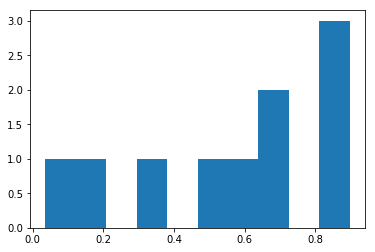

In [45]:
import matplotlib.pyplot as plt
np.random.rand(10)
np.random.seed(20)
plt.hist(x=np.random.rand(10))
plt.show()

In [60]:
np.random.randint(0,50,10).reshape(5,2) #random int between  0 and 49

array([[48, 49],
       [44, 33],
       [23, 13],
       [46, 39],
       [43, 24]])

In [65]:
arr = np.random.randint(5,21,6)
print(arr)
arr.max()

[19 16 16 12  9  6]


19

In [66]:
arr.argmax()#returns the index position of maxvalue in my array

0

In [68]:
arr.argmin()#6th elememt is min

5

In [22]:
pl = ('%s is excellent in math and analytical thinking')
pl%("Vaibhav")

'Vaibhav is excellent in math and analytical thinking'

In [107]:
pl2=('%s is %d years of old')
pl2%("Pavan",23)

'Pavan is 23 years of old'

### Udemy:

In [2]:
##-------Data Preprocessing---------##
##-----------To bring the packages into python environment-----------------##

import numpy as np #All mathematical functions available here
import matplotlib.pyplot as plt# to plot the nice charts we have to use this
import pandas as pd# to import and manage the datasets.

In [3]:
##-------Setting working directory dataset----------##
import os
os.chdir("E:\\Courses\\Udemy\\Machine Learning A-Z Template Folder\\Part 1 - Data Preprocessing\\Section 2 -------------------- Part 1 - Data Preprocessing --------------------")
os.listdir()

['categorical_data.py',
 'categorical_data.R',
 'Data.csv',
 'data_preprocessing_template.py',
 'data_preprocessing_template.R',
 'missing_data.py',
 'missing_data.R',
 'std_and_norm_diff.png']

In [4]:
data = pd.read_csv("Data.csv")
data

#We have to create IDV matrix as X and DV as Y

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [5]:
X= data.iloc[:,:-1].values #it will take only values
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [6]:
y = data.iloc[:,3].values
y

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'], dtype=object)

### classes and objects:
    A class is the model of something we want to build. For example, if we make a house construction plan that gathers the instructions on how to build a house, then this construction plan is the class.

    An object is an instance of the class. So if we take that same example of the house construction plan, then an object is simply a house. A house (the object) that was built by following the instructions of the construction plan (the class).
    
    And therefore there can be many objects of the same class, because we can build many houses from the construction plan.

In [7]:
##----Dealing with missing data----##

#np.sum(pd.isnull(data)) (OR)

data.apply(lambda x: sum(x.isnull()), axis = 0)

Country      0
Age          1
Salary       1
Purchased    0
dtype: int64

In [8]:
from sklearn.preprocessing import Imputer #Imputer class

##------------Importing Missing values for columns-------------###

imputer = Imputer(missing_values="NaN",strategy="mean",axis=0)
imputer = imputer.fit(X[:,1:3])
X[:,1:3] = imputer.transform(X[:,1:3] )

##------------ (or)Importing Missing values for columns-------------###

from sklearn.preprocessing import Imputer
def nan_padding(data, columns):
    for column in columns:
        imputer=Imputer()
        data[column]=imputer.fit_transform(data[column].values.reshape(-1,1))
    return data

In [9]:
X[:,1:3] #(or)
#cols =['Salary','Age']
#nan_padding(data,cols)

array([[44.0, 72000.0],
       [27.0, 48000.0],
       [30.0, 54000.0],
       [38.0, 61000.0],
       [40.0, 63777.77777777778],
       [35.0, 58000.0],
       [38.77777777777778, 52000.0],
       [48.0, 79000.0],
       [50.0, 83000.0],
       [37.0, 67000.0]], dtype=object)

In [10]:
X[:,0]

array(['France', 'Spain', 'Germany', 'Spain', 'Germany', 'France', 'Spain',
       'France', 'Germany', 'France'], dtype=object)

In [11]:
##-categorical variables--------##
#in my dataset 2 cols are contains categories so called as categorical variables.
## Encoding categorical data'

from sklearn.preprocessing import LabelEncoder,OneHotEncoder
labelencoder_x = LabelEncoder() #creating label_x object of labelencoder class from sklearn.preprocessing library
X[:,0] = labelencoder_x.fit_transform(X[:,0])#returns the encoded values of categories
onehotencoder = OneHotEncoder(categorical_features=[0])
X=onehotencoder.fit_transform(X).toarray()


In [12]:
import numpy as np
np.set_printoptions(suppress=True)
X

array([[     1.        ,      0.        ,      0.        ,     44.        ,
         72000.        ],
       [     0.        ,      0.        ,      1.        ,     27.        ,
         48000.        ],
       [     0.        ,      1.        ,      0.        ,     30.        ,
         54000.        ],
       [     0.        ,      0.        ,      1.        ,     38.        ,
         61000.        ],
       [     0.        ,      1.        ,      0.        ,     40.        ,
         63777.77777778],
       [     1.        ,      0.        ,      0.        ,     35.        ,
         58000.        ],
       [     0.        ,      0.        ,      1.        ,     38.77777778,
         52000.        ],
       [     1.        ,      0.        ,      0.        ,     48.        ,
         79000.        ],
       [     0.        ,      1.        ,      0.        ,     50.        ,
         83000.        ],
       [     1.        ,      0.        ,      0.        ,     37.        ,
      

In [13]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y =LabelEncoder()
y= labelencoder_x.fit_transform(y)

## Final Cleaned array:

In [14]:
print(X)
print(y)

[[     1.              0.              0.             44.          72000.        ]
 [     0.              0.              1.             27.          48000.        ]
 [     0.              1.              0.             30.          54000.        ]
 [     0.              0.              1.             38.          61000.        ]
 [     0.              1.              0.             40.          63777.77777778]
 [     1.              0.              0.             35.          58000.        ]
 [     0.              0.              1.             38.77777778  52000.        ]
 [     1.              0.              0.             48.          79000.        ]
 [     0.              1.              0.             50.          83000.        ]
 [     1.              0.              0.             37.          67000.        ]]
[0 1 0 0 1 1 0 1 0 1]


In [15]:
from sklearn.cross_validation import train_test_split

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state= 0) #20%test data and 80%train set.

In [17]:
print(X_train.shape[0]) #8 obs in train set

print(X_test.shape[0])


print(y_train.shape[0])


print(y_test.shape[0])

8
2
8
2


In [18]:
from sklearn.preprocessing import StandardScaler
stand_X = StandardScaler()
X = stand_X.fit_transform(X)

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state= 0) # 20%test data and 80%train set.

In [20]:
y_test

array([0, 0], dtype=int64)

## Feature Scalling:

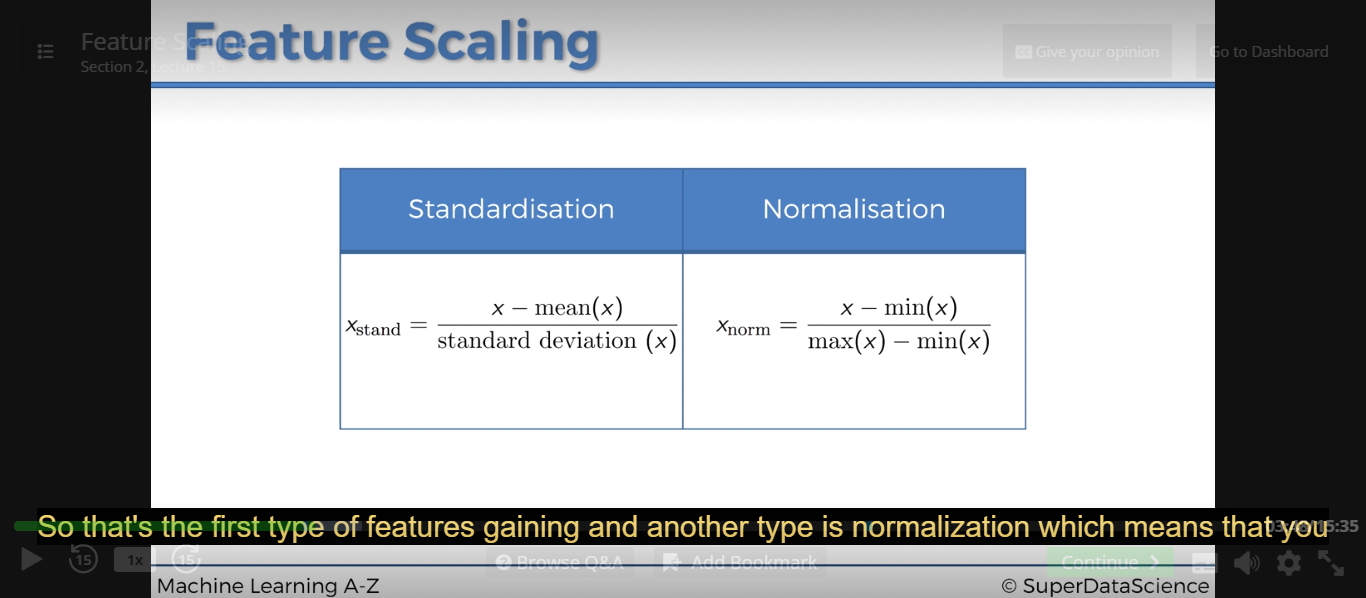

In [21]:

from IPython.core.display import Image,display
display(Image("std_and_norm_diff.png"))

In [22]:
#By doing it no variable is dominated by ohter.
from sklearn.preprocessing import StandardScaler
stand_X = StandardScaler()
X_train = stand_X.fit_transform(X_train)
X_test = stand_X.fit_transform(X_test)


In [23]:
X_test = stand_X.transform(X_test)

In [24]:
X_test

array([[ 0.81649658, -1.52752523,  0.65465367, -0.81037595, -1.08226829],
       [ 0.81649658, -1.52752523,  0.65465367,  0.56593151,  0.43092729]])

##  Polyinomial Regression:

In [25]:
#https://stats.stackexchange.com/questions/92065/why-is-polynomial-regression-considered-a-special-case-of-multiple-linear-regres/92069#92069?newreg=83a0d1c98634407ea5b2642c7c35a726

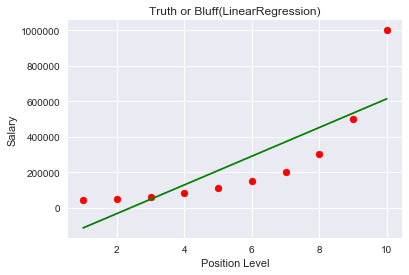

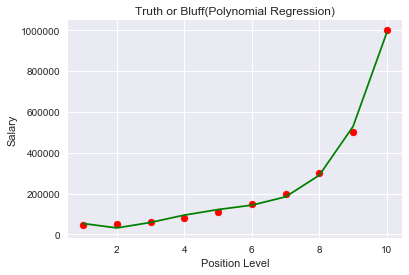

In [236]:
import os
os.chdir("E:\\Courses\\Udemy\\Machine Learning A-Z Template Folder\\Part 2 - Regression\\Section 6 - Polynomial Regression")
os.listdir()

salaries = pd.read_csv("Position_Salaries.csv")
salaries.head(10) #model objective is to predict for level 6.5 what colud be the salary


import numpy as np
X = np.array(salaries.iloc[:,1:2]) #X should be an array, y should be an vector
#or X=salaries.iloc[:,1:2].values
X.shape

y = np.array(salaries.iloc[:,2])
y.shape

from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(X,y)

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
x_poly = poly_reg.fit_transform(X)

lin_reg2 = LinearRegression()
model2 = lin_reg2.fit(x_poly,y)

plt.scatter(X,y,c="red")
plt.plot(X,model1.predict(X),"green")
plt.title("Truth or Bluff(LinearRegression)")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()

plt.scatter(X,y,c="red")
plt.plot(X,model2.predict(x_poly),"green")
plt.title("Truth or Bluff(Polynomial Regression)")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show() #By changing Degree to 4 perfectly fittted

In [55]:
import os
os.chdir("E:\\Courses\\Udemy\\Machine Learning A-Z Template Folder\\Part 2 - Regression\\Section 7 - Support Vector Regression (SVR)")
os.listdir()

['Position_Salaries.csv', 'SVR', 'SVR.zip', '__MACOSX']

In [38]:
(model1.predict(6.5),2)

(array([ 330378.78787879]), 2)

In [56]:
data

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


## Support Vector Regression:

In [31]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
path = "E:\\Courses\\Udemy\\Machine Learning A-Z Template Folder\\Part 2 - Regression\\Section 7 - Support Vector Regression (SVR)\\"
filename="Position_Salaries.csv"

data=pd.read_csv(path+filename)

print(list(data))

X = data.loc[:,['Level']]
print(X.shape)
y=data.loc[:,'Salary']

y.shape

['Position', 'Level', 'Salary']
(10, 1)


(10,)

In [32]:
model = SVR(kernel='rbf')#Linearly separabel
model.fit(X,y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

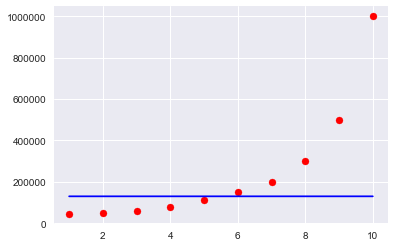

In [33]:
import pylab as plt
plt.scatter(X,y,color="red")
plt.plot(X,model.predict(X),color="blue")
plt.show()

## Let see after Scalling:

In [46]:
from sklearn.preprocessing import StandardScaler
scalling = StandardScaler()
X= scalling.fit_transform(X)
y=scalling.fit_transform(y)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [47]:
model_new = SVR(kernel='rbf')#Linearly separabel
model_new.fit(X,y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

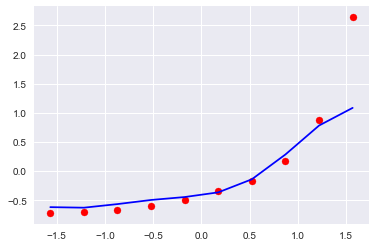

In [48]:
import pylab as plt
plt.scatter(X,y,color="red")
plt.plot(X,model_new.predict(X),color="blue")
plt.show()

In [49]:
np.set_printoptions(suppress=True)
value = model.predict(scalling.transform(np.array([[6.5]])))
print("value is %.2f"%value)

value is 130001.56


In [50]:
np.set_printoptions(suppress=True)

## SVM Kernel along with K fold cross validation:

    **WHY**: If we couldn't separable linearly we go to take the data to higher dimensions so that it is easy to seperate the data linearly. So this can be done by kernerl trick. we form a boundary which is called as HyperPlane.
    Kernel Trick:


<module 'sklearn.metrics' from 'C:\\Users\\Admin\\Anaconda3\\lib\\site-packages\\sklearn\\metrics\\__init__.py'>

(400, 3)
(400,)
[[    19  19000      1]
 [    35  20000      1]
 [    26  43000      0]
 [    27  57000      0]
 [    19  76000      1]
 [    27  58000      1]
 [    27  84000      0]
 [    32 150000      0]
 [    25  33000      1]
 [    35  65000      0]]
[0 0 0 0 0 0 0 1 0 0]


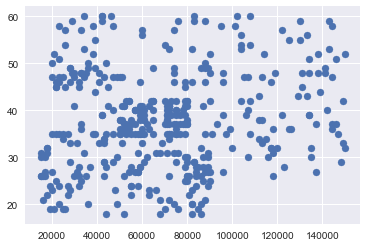

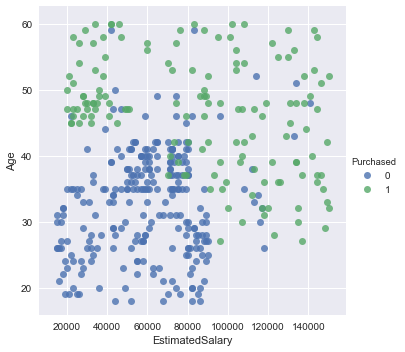

ConfusionMatrix on Train Data:

[[167  17]
 [ 10  86]]


ConfusionMatrix on Test Data:

[[68  5]
 [ 3 44]]
TrainScore is:0.90
TestScore is:0.93


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [36]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cross_validation import train_test_split
from sklearn import metrics

path = "E:\\Courses\\Udemy\\Machine Learning A-Z Template Folder\\Part 3 - Classification\\Section 17 - Kernel SVM\\Kernel_SVM\\"
fileName = "Social_Network_Ads.csv"

sn_data = pd.read_csv(path+fileName)

labelencoder=LabelEncoder()
sn_data['Gender'] = labelencoder.fit_transform(sn_data['Gender'])
sn_data['Purchased'] = sn_data['Purchased'].astype('object')

X=sn_data.loc[:,['Age','EstimatedSalary','Gender']].values
print(X.shape)

y=sn_data.loc[:,['Purchased']].values

y.shape = (400,)
print(y.shape)
print(X[0:10])
print(y[0:10])


plt.scatter(x=sn_data['EstimatedSalary'],y=sn_data['Age'])
plt.show()

sns.lmplot('EstimatedSalary', 'Age', data=sn_data, hue='Purchased', fit_reg=False)
plt.show()

#https://stackoverflow.com/questions/26139423/plot-different-color-for-different-categorical-levels-using-matplotlib

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,train_size = 0.7)    

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

y_train = list(y_train)

y_test = list(y_test)

#----------------------------Fitting Kernel SVM to the Training set--------------------##

from sklearn.svm import SVC

classifier = SVC(kernel = 'rbf', random_state = 0)

classifier.fit(X_train, y_train)#radial basis function kernel
    
##-------------------------------------Predicitons----------------------------------###

y_train_predict = classifier.predict(X_train)

y_test_predict = classifier.predict(X_test)

###----------------------------Performance Metrics-----------------------------------##


print("ConfusionMatrix on Train Data:\n")
print(metrics.confusion_matrix(y_train,y_train_predict))
Train_score = metrics.accuracy_score(y_train,y_train_predict)
print("\n")

print("ConfusionMatrix on Test Data:\n")
print(metrics.confusion_matrix(y_test,y_test_predict))
Test_score = metrics.accuracy_score(y_test,y_test_predict,normalize=True)

print("TrainScore is:%.2f"%Train_score)

print("TestScore is:%.2f"%Test_score)

## K-Fold Cross Validaiton to measure the Performance:

#   On Training Dataset:

In [37]:
from sklearn.model_selection import cross_val_score
accuracies= cross_val_score(estimator=classifier,X=X_test,y=y_test,cv=20)

final_accuracy= accuracies.mean()
print("Final Accracy is:%.2f"%final_accuracy)

Final Accracy is:0.91


#   On Test Dataset:

In [38]:
from sklearn.model_selection import cross_val_score
accuracies= cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=20)

final_accuracy= accuracies.mean()
print("Final Accracy is:%.2f"%final_accuracy)

Final Accracy is:0.90


## Analytics Vidya K fold throug FUncitons:https://www.analyticsvidhya.com/blog/2015/11/improve-model-performance-cross-validation-in-python-r/#comment-138780

### KFold Cross Validation on BOSTON House prices data(Regression):

# Writing Dataframe as CSV:

In [9]:
from sklearn.datasets import load_boston

data = load_boston()

np.set_printoptions(suppress=True)
X= data.data
y = data.target
print(type(X))
print(data.feature_names)
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cross_validation import train_test_split
from sklearn import metrics
boston = pd.DataFrame(X,columns=data.feature_names)
boston['MEDV'] = data.target
boston.head()
import os
os.chdir("E:\\Data sets")
boston.to_csv("Boston_house.csv")

<class 'numpy.ndarray'>
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


## Preprocessing

In [ ]:
from sklearn.datasets import load_boston

data = load_boston()

np.set_printoptions(suppress=True)
X= data.data
y = data.target
print(type(X))
print(data.feature_names)

## Splitting:

In [10]:
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

## Model Creating:

In [11]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

## Prediction using created Model:

In [12]:
train_predicions = model.predict(X_train)
test_predicions = model.predict(X_test)

## Performance Metrics:

In [13]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_train,train_predicions))
print(mean_squared_error(y_test,test_predicions))

2.64340367232
9.69241381579


## Kfold Cross Validations:

In [19]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=model,X=X_test,y=y_test,cv=10,scoring="neg_mean_squared_error")
np.sqrt(-scores).mean

array([ 2.78085756,  2.17680959,  3.67562693,  2.07127014,  2.25708071,
        2.47957389,  7.8003517 ,  5.58702246,  2.80633094,  3.06344251])

In [209]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cross_validation import train_test_split
from sklearn import metrics
path="E:\\Courses\\Udemy\\Machine Learning A-Z Template Folder\\Part 2 - Regression\\Section 5 - Multiple Linear Regression\\"
filename="50_Startups.csv"

data = pd.read_csv(path+filename)
print(data.head())

print('---Summary----')
print(data.describe())
print('\n')
print(np.sum(pd.isnull(data)))

print(list(data))

X= data.loc[:,['R&D Spend','Administration','Marketing Spend','State']].values
print(X[0:5])
print(X.shape)

y= data.loc[:,['Profit']]
print(y.shape)

   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94
---Summary----
           R&D Spend  Administration  Marketing Spend         Profit
count      50.000000       50.000000        50.000000      50.000000
mean    73721.615600   121344.639600    211025.097800  112012.639200
std     45902.256482    28017.802755    122290.310726   40306.180338
min         0.000000    51283.140000         0.000000   14681.400000
25%     39936.370000   103730.875000    129300.132500   90138.902500
50%     73051.080000   122699.795000    212716.240000  107978.190000
75%    101602.800000   144842.180000    299469.085000  139765.977500
max    165349.20000

In [210]:
##--------------Changing Lables into numbers-----------------##
labelencoder = LabelEncoder()
X[:, 3] = labelencoder.fit_transform(X[:, 3])

In [211]:
print(X[0:5])

[[165349.2 136897.8 471784.1 2]
 [162597.7 151377.59 443898.53 0]
 [153441.51 101145.55 407934.54 1]
 [144372.41 118671.85 383199.62 2]
 [142107.34 91391.77 366168.42 1]]


In [212]:
##-------Creating DUmmies--------------##
onehotencoder = OneHotEncoder(categorical_features = [3])
X = onehotencoder.fit_transform(X).toarray()

In [213]:
print(X[0:5])

[[      0.         0.         1.    165349.2   136897.8   471784.1 ]
 [      1.         0.         0.    162597.7   151377.59  443898.53]
 [      0.         1.         0.    153441.51  101145.55  407934.54]
 [      0.         0.         1.    144372.41  118671.85  383199.62]
 [      0.         1.         0.    142107.34   91391.77  366168.42]]


In [214]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state= 0) #20%test data and 80% train set.

In [215]:
print(X_train[0:5])

[[      0.         1.         0.     55493.95  103057.49  214634.81]
 [      0.         0.         1.     46014.02   85047.44  205517.64]
 [      0.         1.         0.     75328.87  144135.98  134050.07]
 [      1.         0.         0.     46426.07  157693.92  210797.67]
 [      0.         1.         0.     91749.16  114175.79  294919.57]]


In [216]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [217]:
y_test_pred = model.predict(X_test)
mean_squared_error(y_test,y_test_pred)

83502864.032592952

In [226]:
import statsmodels.formula.api as sm
X_opt = X[:,[0,1,2,3,4,5]]

reg_OLS = sm.OLS(endog=y,exog=X_opt).fit()
reg_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Thu, 05 Oct 2017   Prob (F-statistic):           1.34e-27
Time:                        16:59:43   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
x2          5.032e+04   7251.767      6.940      0.000    3.57e+04    6.49e+04
x3          5.008e+04   6952.587      7.204      0.000    3.61e+04    6.41e+04
x4             0.8060      0.046     17.369      0.000       0.712       0.900
x5            -0.0270      0.052     -0.517      0.608      -0.132       0.078
x6             0.0270      0.017      1.574      0.123      -0.008       0.062
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     2.45e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [227]:
import statsmodels.formula.api as sm
X_opt = X[:,[0,1,2,4,5]]

reg_OLS = sm.OLS(endog=y,exog=X_opt).fit()
reg_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     17.83
Date:                Thu, 05 Oct 2017   Prob (F-statistic):           7.78e-09
Time:                        17:01:01   Log-Likelihood:                -576.91
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      45   BIC:                             1173.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          1.903e+04   1.84e+04      1.033      0.307   -1.81e+04    5.61e+04
x2          1.733e+04   1.94e+04      0.893      0.376   -2.17e+04    5.64e+04
x3          2.291e+04   1.88e+04      1.220      0.229   -1.49e+04    6.07e+04
x4             0.3239      0.133      2.426      0.019       0.055       0.593
x5             0.2507      0.031      7.997      0.000       0.188       0.314
==============================================================================
Omnibus:                        5.729   Durbin-Watson:                   1.266
Prob(Omnibus):                  0.057   Jarque-Bera (JB):                5.349
Skew:                          -0.461   Prob(JB):                       0.0689
Kurtosis:                       4.311   Cond. No.                     2.26e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.26e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Section 32  :Model Selection:

In [144]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline
import os
import seaborn as sns
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

path = "E:\\Courses\\Udemy\\Machine Learning A-Z Template Folder\\Part 10 - Model Selection & Boosting\\Section 48 - Model Selection\\"
filename = "Social_Network_Ads.csv"
data=pd.read_csv(path+filename)

In [69]:
data.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
5,15728773,Male,27.0,58000.0,0
6,15598044,Female,27.0,84000.0,0
7,15694829,Female,32.0,150000.0,1
8,15600575,Male,25.0,33000.0,0
9,15727311,Female,35.0,65000.0,0


In [70]:
X = data.iloc[:,[2,3]].values
y= data.iloc[:,4].values

In [71]:
y.shape

(400,)

In [72]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state= 0) #20%test data and 80%train set.

In [73]:
scalling = StandardScaler()
X_train= scalling.fit_transform(X_train)
X_test=scalling.fit_transform(X_test)

In [75]:
from sklearn.svm import SVC

model = SVC(kernel = 'rbf', random_state = 0)

model.fit(X_train, y_train)#radial basis function kernel

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [77]:
y_pred = model.predict(X_test)

In [79]:
confusion_matrix(y_test,y_pred)

array([[72,  7],
       [ 4, 37]])

In [82]:
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred)

0.90833333333333333

In [84]:
from sklearn.model_selection import cross_val_score
cross_val_score(model,X_test,y_test,cv=10).mean()

0.89848484848484866

## Improving the Model Performance:(GRID-SEARCH CV):

## Pictorial Representiaon of GRID and RANDOM serach CV's:

When searching a 2-dimensional space (i.e. optimizing two parameters), the process of grid search will look like
 GRDISEARCH CV


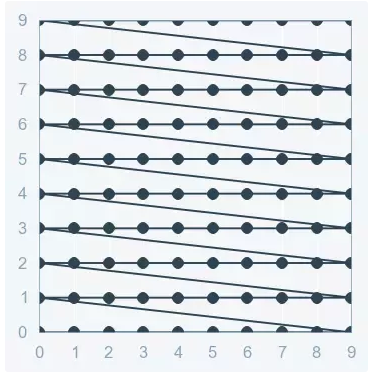

RANDOMSEARCH CV


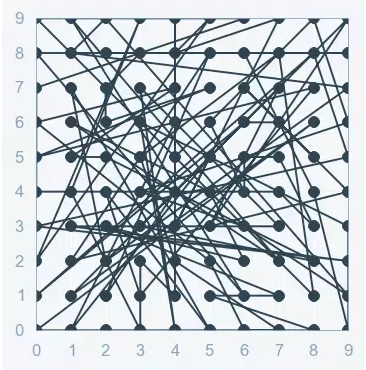

In [7]:
from IPython.core.display import Image, display
desk_path = 'C:\\Users\\Admin\\Desktop\\'
import os
os.chdir(desk_path)
print("When searching a 2-dimensional space (i.e. optimizing two parameters), the process of grid search will look like\n GRDISEARCH CV")
display(Image('Grid_search.png'))
print("RANDOMSEARCH CV")
display(Image('RandomSearch.png'))

# Parameter Tuning:

In [85]:
from sklearn.model_selection import GridSearchCV

In [132]:
##Step:1 Choosing Parameters which have to tested 
params = [{'C':[1,10,100,1000],'kernel':['linear'],"random_state":[0,42,52,62]},{'C':[1,10,100,1000],'kernel':['rbf'],'gamma':np.arange(0.1, 3.0, 0.1),"random_state":[0,42]}]

In [134]:
grid_search =GridSearchCV(estimator=model,param_grid=params,scoring="accuracy",cv=10,n_jobs=-1)#for large datasets take n_jobs=-1 which share GPU

In [135]:
grid_search = grid_search.fit(X_train,y_train)

In [136]:
#to look at the results:
best_accuracy = grid_search.best_score_

In [137]:
best_accuracy

0.92500000000000004

In [138]:
best_parameters = grid_search.best_params_

In [139]:
best_parameters

{'C': 1, 'gamma': 1.5000000000000002, 'kernel': 'rbf', 'random_state': 0}

In [140]:
final_model = SVC(kernel = 'rbf', random_state = 0,C=1,gamma=1.5)

final_model.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=1.5, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [142]:
y_pred_new = final_model.predict(X=X_test)

In [143]:
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred_new)

0.90833333333333333

# Decision Tree Classification:

In [102]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline
import os
import seaborn as sns
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

path = "E:\\Courses\\Udemy\\Machine Learning A-Z Template Folder\\Part 10 - Model Selection & Boosting\\Section 48 - Model Selection\\"
filename = "Social_Network_Ads.csv"
data=pd.read_csv(path+filename)

(array([ 51.,  39.,  58.,  50.,  82.,  40.,  22.,  19.,  17.,  22.]),
 array([  15000.,   28500.,   42000.,   55500.,   69000.,   82500.,
          96000.,  109500.,  123000.,  136500.,  150000.]),
 <a list of 10 Patch objects>)

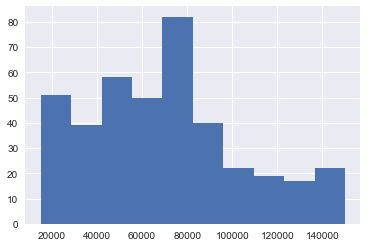

In [103]:
plt.hist(data.EstimatedSalary,stacked=True,)

In [104]:
list(data)

['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased']

In [105]:
data.dtypes

User ID              int64
Gender              object
Age                float64
EstimatedSalary    float64
Purchased            int64
dtype: object

In [106]:
data['Gender'] = data['Gender'].astype('object')
data.dtypes

User ID              int64
Gender              object
Age                float64
EstimatedSalary    float64
Purchased            int64
dtype: object

In [107]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
data['Gender'] = encode.fit_transform(data.Gender)

In [108]:
X=data.iloc[:,1:4]
print(X[0:3])
y=data.iloc[:,4]
print(X.shape)
print(y.shape)
print(y[0:5])

   Gender   Age  EstimatedSalary
0       1  19.0          19000.0
1       1  35.0          20000.0
2       0  26.0          43000.0
(400, 3)
(400,)
0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64


In [109]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,train_size=0.7)

In [110]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [113]:
from sklearn import metrics
metrics.accuracy_score(y_test,model.predict(X_test))

0.8833333333333333

In [114]:
from sklearn.model_selection import cross_val_score
cross_val_score(model,X_test,y_test,cv=10).mean()

0.83939393939393947

In [132]:
params = [{'criterion':['gini'],'max_features':['auto','sqrt','log2'],'max_depth':[11,20,30,50,100]},{'criterion':['entropy'],'max_depth':[11,20,30,50,100],'max_features':['auto','sqrt','log2']}]
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
grid_search = GridSearchCV(param_grid=params,estimator=model)
rand_search = RandomizedSearchCV(param_distributions=params,estimator=model,cv=10,scoring='accuracy')
                                 #')
grid_search.fit(X_test,y_test)
grid_search.best_params_              

{'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt'}

In [135]:
rand_search = RandomizedSearchCV(param_distributions=params,estimator=model,cv=10,scoring='accuracy',n_iter=20)
rand_search.fit(X_test,y_test)

AttributeError: 'list' object has no attribute 'values'

In [117]:
model = grid_search.best_estimator_

In [118]:
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [119]:
y_pred = model.predict(X_test)

In [120]:
from sklearn import metrics

In [121]:
metrics.confusion_matrix(y_test,y_pred)

array([[72,  7],
       [ 7, 34]])

In [122]:
metrics.accuracy_score(y_test,y_pred)

0.8833333333333333

In [123]:
cross_val_score(model,X_test,y_test,cv=10)

array([ 0.92307692,  0.75      ,  0.75      ,  0.83333333,  1.        ,
        0.75      ,  0.83333333,  0.75      ,  0.83333333,  0.72727273])